In [136]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [137]:
def plotDecisionRegions(X, model, idx0, idx1, figname=''):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # This attribute matrix must also follow the same shape 
    # as the one created for the training.
    attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

    Z = model.predict(attribute_matrix)

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

    # Plot also the training points.
    plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
    plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    
    plt.title('Noisy ' + figname + ' function')
    plt.savefig(figname+'.png', dpi=600)

    plt.show()

## Lógica AND

In [138]:
# Reset PN sequence generator.
seed = 7
np.random.seed(seed)

In [139]:
# Number of examples.
N = 1000

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function.
y = x1 & x2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attribute vectors.
X_ = np.c_[x1, x2]

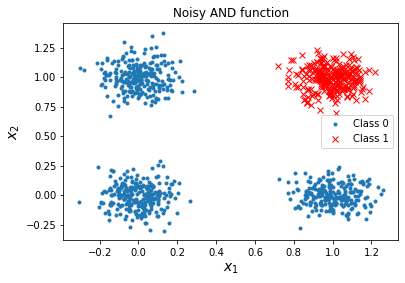

In [140]:
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)

plt.plot(x1[idx0.ravel()], x2[idx0.ravel()], '.', label='Class 0')
plt.plot(x1[idx1.ravel()], x2[idx1.ravel()], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy AND function')
plt.legend()
plt.show()

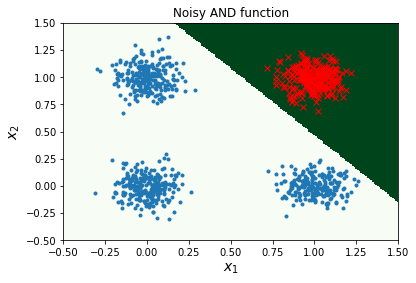

In [141]:
# Add bias to feature matrix.
X = np.c_[np.ones((len(y), 1)), X_]

# Instantiate the perceptron object.
per = Perceptron(fit_intercept=False, random_state=seed)

# Train the model.
per.fit(X, y.ravel())

plotDecisionRegions(X_, per, idx0, idx1, 'AND')

## Lógica OR

In [142]:
# Reset PN sequence generator.
seed = 7
np.random.seed(seed)

In [143]:
# Number of examples.
N = 1000

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function.
y = x1 | x2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attribute vectors.
X_ = np.c_[x1, x2]

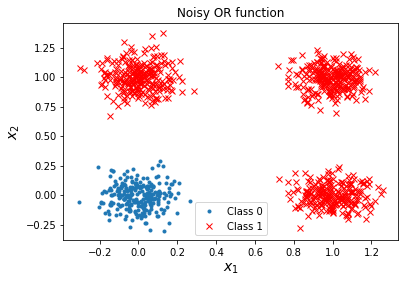

In [144]:
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)

plt.plot(x1[idx0.ravel()], x2[idx0.ravel()], '.', label='Class 0')
plt.plot(x1[idx1.ravel()], x2[idx1.ravel()], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy OR function')
plt.legend()
plt.show()

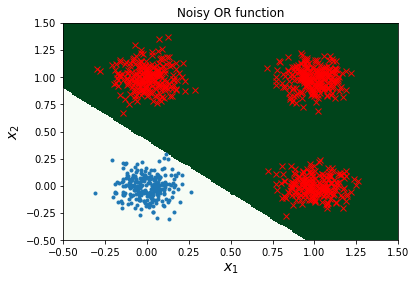

In [145]:
# Add bias to feature matrix.
X = np.c_[np.ones((len(y), 1)), X_]

# Instantiate the perceptron object.
per = Perceptron(fit_intercept=False, random_state=seed)

# Train the model.
per.fit(X, y.ravel())

plotDecisionRegions(X_, per, idx0, idx1, 'OR')

## Lógica XOR

In [146]:
# Reset PN sequence generator.
seed = 7
np.random.seed(seed)

In [147]:
# Number of examples.
N = 1000

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function.
y = x1 ^ x2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attribute vectors.
X_ = np.c_[x1, x2]

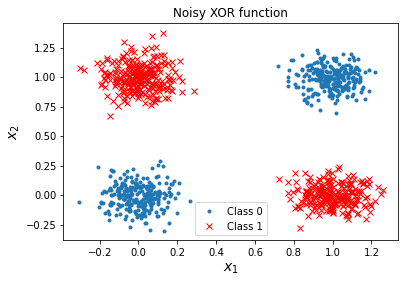

In [148]:
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)

plt.plot(x1[idx0.ravel()], x2[idx0.ravel()], '.', label='Class 0')
plt.plot(x1[idx1.ravel()], x2[idx1.ravel()], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy XOR function')
plt.legend()
plt.show()

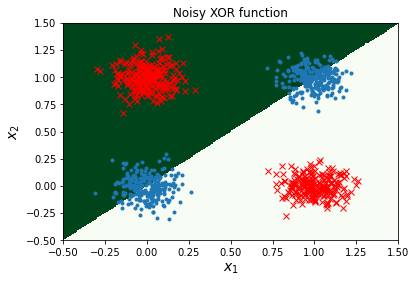

In [149]:
# Add bias to feature matrix.
X = np.c_[np.ones((len(y), 1)), X_]

# Instantiate the perceptron object.
per = Perceptron(fit_intercept=False, tol=1e-4, max_iter=2000, eta0=1, random_state=8)

# Train the model.
per.fit(X, y.ravel())

plotDecisionRegions(X_, per, idx0, idx1, 'XOR')